In [1]:
import numpy

from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.7) &
(games_df['odds_open_tb25'] >= 1.6) & (games_df['odds_open_tb25'] <= 2.5)
]

In [3]:
segmented_df.shape

(611, 1453)

In [4]:
segmented_sort_by_odds_df = segmented_df.sort_values(by=['odds_open_win1'])
print(segmented_sort_by_odds_df['odds_open_win1'][25:50])

1866    1.840
752     1.840
688     1.840
284     1.840
1394    1.840
1471    1.840
2072    1.840
2168    1.847
210     1.850
1095    1.850
984     1.850
1068    1.850
1868    1.850
1408    1.850
2183    1.854
1441    1.860
1050    1.860
1840    1.870
1052    1.870
822     1.870
2074    1.870
932     1.870
215     1.870
758     1.870
2155    1.877
Name: odds_open_win1, dtype: float64


In [5]:
numpy.percentile(segmented_df['simple_expected_total_value'],85)

5.66

In [6]:
segmented_df.describe()

,id,date_match_unix,time_first,time_match,team_1_id,team_1_goal,team_2_id,team_2_goal,country_id,league_id,...,profit_win1_open,profit_win1_close,profit_draw_open,profit_draw_close,profit_win2_open,profit_win2_close,profit_tm25_open,profit_tm25_close,profit_tb25_open,profit_tb25_close
count,611.000000,6.110000e+02,611.000000,611.000000,611.000000,611.000000,611.00000,611.000000,611.0,611.0,...,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,79776.877250,1.560715e+09,47.207856,94.520458,8411.975450,1.415712,8538.00982,1.076923,291.0,325.0,...,-0.009170,0.003005,-0.052995,-0.058592,-0.050851,-0.047070,0.026213,0.028245,-0.104848,-0.078638
std,34109.138536,5.297457e+07,1.695994,1.828057,3539.224488,1.110611,3783.73910,1.061537,0.0,0.0,...,1.101313,1.126399,1.548824,1.540891,1.580723,1.611091,0.943810,0.952189,0.996255,1.032587
min,15214.000000,1.475258e+09,45.000000,92.000000,6711.000000,0.000000,6711.00000,0.000000,291.0,325.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,57867.500000,1.514045e+09,46.000000,93.000000,6719.000000,1.000000,6719.00000,0.000000,291.0,325.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,85144.000000,1.556312e+09,47.000000,94.000000,6723.000000,1.000000,6723.00000,1.000000,291.0,325.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.630000,0.600000,-1.000000,-1.000000
75%,101542.000000,1.609037e+09,48.000000,95.000000,6731.000000,2.000000,6731.00000,2.000000,291.0,325.0,...,1.115000,1.140000,2.200000,2.170000,1.770000,1.510000,0.860000,0.860000,0.930000,0.960000
max,142213.000000,1.647785e+09,71.000000,113.000000,26972.000000,6.000000,26972.00000,5.000000,291.0,325.0,...,1.700000,2.720000,2.970000,3.500000,3.990000,4.980000,1.440000,1.810000,1.440000,1.810000


Count: 611
Open profit: -5.6030000000000015
Close profit: 1.8360000000000056
Open ROI: -0.009170212765957449
Close ROI: 0.003004909983633397
UDI: -0.0219801138970775
AxesSubplot(0.125,0.125;0.775x0.755)


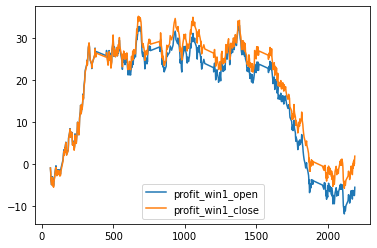

In [7]:
utils.print_home_win_result(segmented_df)

In [8]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_difference_A_H,-0.183193
expected_difference_H_A,0.183193
expected_difference_03_A_H,-0.180275
expected_difference_03_H_A,0.180275
paper_diff_03_H_A,0.146093
paper_diff_03_A_H,-0.146093
paper_diff_A_H,-0.143112
paper_diff_H_A,0.143112
expected_goal_03_H,0.137322
paper_03_H,0.125759


In [9]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win1')

,low,high,diff
paper_diff_A_H,0.301840,0.055946,0.245894
paper_diff_H_A,-0.301840,-0.055946,0.245894
expected_difference_H_A,0.201489,0.413407,0.211918
expected_difference_A_H,-0.201489,-0.413407,0.211918
sum_ufr_classic_loc,5.248070,5.038424,0.209647
expected_difference_H_A_loc,0.224861,0.419257,0.194396
expected_difference_A_H_loc,-0.224861,-0.419257,0.194396
paper_diff_03_A_H,0.226667,0.032322,0.194345
paper_diff_03_H_A,-0.226667,-0.032322,0.194345
expected_difference_03_H_A,0.146674,0.327408,0.180734


In [10]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_H_A'] >= 0.41) & (segmented_df['expected_difference_03_H_A'] >= 0.33)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_H_A',
    'expected_difference_03_H_A',
], 'udi_win1')

,low,high,diff
expected_difference_H_A,0.752730,0.696479,0.056251
expected_difference_03_H_A,0.508495,0.520814,0.012319


Count: 74
Open profit: 10.455
Close profit: 9.366999999999999
Open ROI: 0.14128378378378378
Close ROI: 0.12658108108108107
UDI: 0.027144414332090857
AxesSubplot(0.125,0.125;0.775x0.755)


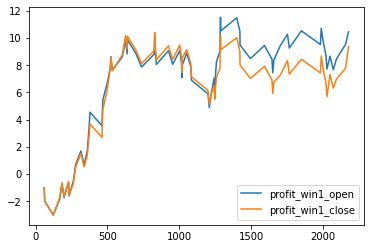

In [11]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference_H_A'] >= 0.697) & (segmented_df['expected_difference_03_H_A'] >= 0.52)
]
utils.print_home_win_result(filtered_result_df)